In [2]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
from collections import defaultdict
import os, random

from scipy import sparse
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:.2f}'.format


In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:80% !important;}</style>"))

# 경로 설정
data_path = './data'
# saved_path = './saved'
# output_path = './submission'

C:\Users\user\AppData\Local\Temp\ipykernel_18272\2297202357.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [4]:
# 데이터 불러오기 
# 시청 시작 데이터 A
history_df = pd.read_csv(os.path.join(data_path, 'history_data.csv'), encoding='utf-8')
# 시청 종료 데이터 A
watch_e_df = pd.read_csv(os.path.join(data_path, 'watch_e_data.csv'), encoding='utf-8')
# 구매 이력 데이터 A
buy_df = pd.read_csv(os.path.join(data_path, 'buy_data.csv'), encoding='utf-8')
# 검색을 통한 시청 데이터 A
search_df = pd.read_csv(os.path.join(data_path, 'search_data.csv'), encoding='utf-8')

# 콘텐츠 일반 메타 정보 B
meta_df = pd.read_csv(os.path.join(data_path, 'meta_data.csv'), encoding='utf-8')
# 콘텐츠 확장 정보 B
meta_data_plus_df = pd.read_csv(os.path.join(data_path, 'meta_data_plus.csv'), encoding='utf-8')

# 프로필 정보 C
profile_df = pd.read_csv(os.path.join(data_path, 'profile_data.csv'), encoding='utf-8')

C:\Users\user\AppData\Local\Temp\ipykernel_18272\1050390000.py:12: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  meta_df = pd.read_csv(os.path.join(data_path, 'meta_data.csv'), encoding='utf-8')


## 이력데이터

### 시청시작 EDA(history_df)

In [54]:
history_df1 = history_df.drop_duplicates(subset=None, keep='first')

print('shape: ', history_df1.shape,'\n')

print('head: ', history_df.head(),'\n')
print('shape: ', history_df.shape,'\n')
print('colname: ', history_df.columns,'\n')
print('info : ', history_df.info(),'\n')
# print('describe : ', history_df.describe())

history_df.describe()





shape:  (899273, 8) 

head:     profile_id           ss_id        log_time act_target_dtl  album_id  \
0           3  20220301115653  20220301115719        MKID003        15   
1           3  20220301115653  20220301115809        MKID003        16   
2           3  20220301115653  20220301115958        MKID003        17   
3           3  20220301115653  20220301120118        MKID003        18   
4           3  20220301115653  20220301120229        MKID003        19   

   payment continuous_play short_trailer  
0      NaN               Y             N  
1      NaN               Y             N  
2      NaN               Y             N  
3      NaN               Y             N  
4      NaN               Y             N   

shape:  (1005651, 8) 

colname:  Index(['profile_id', 'ss_id', 'log_time', 'act_target_dtl', 'album_id',
       'payment', 'continuous_play', 'short_trailer'],
      dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005651 entries, 0 to 1005650
Da

,profile_id,ss_id,log_time,album_id,payment
count,1005651.00,1005651.00,1005651.00,1005651.00,73486.00
mean,13442.69,20220360180729.83,20220360472424.46,3326.15,2117.48
std,8953.50,49280933.61,49301159.58,4192.29,3612.95
min,3.00,20220301000313.00,20220301000418.00,0.00,300.00
25%,5550.00,20220314213978.00,20220315080139.50,416.00,500.00
50%,12237.00,20220328210234.00,20220329070857.00,2052.00,500.00
75%,20371.00,20220412112174.50,20220412172625.00,4217.00,1400.00
max,33032.00,20220430235770.00,20220430235917.00,25916.00,25000.00


In [7]:
history_df[history_df['ss_id']==20220301115653]

,profile_id,ss_id,log_time,act_target_dtl,album_id,payment,continuous_play,short_trailer
0,3,20220301115653,20220301115719,MKID003,15,NaN,Y,N
1,3,20220301115653,20220301115809,MKID003,16,NaN,Y,N
2,3,20220301115653,20220301115958,MKID003,17,NaN,Y,N
3,3,20220301115653,20220301120118,MKID003,18,NaN,Y,N
4,3,20220301115653,20220301120229,MKID003,19,NaN,Y,N
5,3,20220301115653,20220301120450,MKID003,20,NaN,Y,N
6,3,20220301115653,20220301120654,MKID003,21,NaN,Y,N
7,3,20220301115653,20220301120859,MKID003,22,NaN,Y,N
8,3,20220301115653,20220301121104,MKID003,23,NaN,Y,N
9,3,20220301115653,20220301121308,MKID003,24,NaN,Y,N


{'whiskers': [<matplotlib.lines.Line2D at 0x23b7c813f40>,
 'caps': [<matplotlib.lines.Line2D at 0x23b7c6854c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23b7c813ca0>],
 'medians': [<matplotlib.lines.Line2D at 0x23b7c685a00>],
 'fliers': [<matplotlib.lines.Line2D at 0x23b7c685ca0>],
 'means': []}

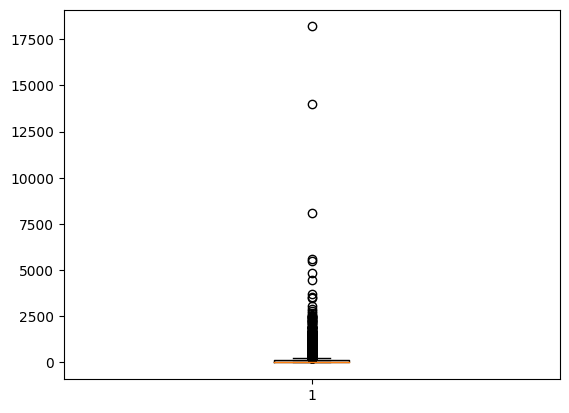

In [ ]:
# history_df['profile_id'].value_counts().sort_index(ascending=True)
# history_df['profile_id'].value_counts(ascending=False)
vc = history_df['profile_id'].value_counts().to_frame().reset_index().rename(columns={'index':'profile_id', 'profile_id':'counts'} )
plt.boxplot(vc['counts'])

In [ ]:
vc = history_df['profile_id'].value_counts().to_frame().reset_index().rename(columns={'index':'profile_id', 'profile_id':'counts'} )


### 시청종료 EDA(watch_e_df)

In [55]:
watch_e_df1 = watch_e_df.drop_duplicates(subset=None, keep='first')
print('shape: ', watch_e_df1.shape,'\n')

print('head: ', watch_e_df.head(),'\n')
print('shape: ', watch_e_df.shape,'\n')
print('colname: ', watch_e_df.columns,'\n')
print('info : ', watch_e_df.info(),'\n')
watch_e_df.describe()

shape:  (800740, 8) 

head:     profile_id           ss_id        log_time act_target_dtl  album_id  \
0           3  20220301115653  20220301115805        MKID049        15   
1           3  20220301115653  20220301115954        MKID049        16   
2           3  20220301115653  20220301120114        MKID049        17   
3           3  20220301115653  20220301120226        MKID049        18   
4           3  20220301115653  20220301120400        MKID049        19   

   watch_time  total_time  continuous_play  
0          46          46                1  
1         104         105                1  
2          76          76                1  
3          67          68                1  
4          90          90                0   

shape:  (892794, 8) 

colname:  Index(['profile_id', 'ss_id', 'log_time', 'act_target_dtl', 'album_id',
       'watch_time', 'total_time', 'continuous_play'],
      dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892794 entries, 0 to 

,profile_id,ss_id,log_time,album_id,watch_time,total_time,continuous_play
count,892794.00,892794.00,892794.00,892794.00,892794.00,892794.00,892794.00
mean,13409.28,20220360164864.48,20220360487457.18,3421.99,185.09,338.50,0.74
std,8970.19,49325029.95,49349397.74,4260.34,219.16,346.33,0.61
min,3.00,20220301000313.00,20220301000531.00,0.00,0.00,19.00,0.00
25%,5550.00,20220314200610.00,20220314220352.25,423.00,34.00,104.00,0.00
50%,12173.00,20220328210107.00,20220329074947.50,2079.00,100.00,271.00,1.00
75%,20339.00,20220412105373.00,20220412175936.00,4424.00,298.00,478.00,1.00
max,33032.00,20220430235015.00,20220430235913.00,25916.00,4769.00,8929.00,3.00


### 구매이력 EDA(buy_df)

In [56]:
buy_df1 = buy_df.drop_duplicates(subset=None, keep='first')
print('shape: ', buy_df1.shape,'\n')

print('head: ', buy_df.head(),'\n')
print('shape: ', buy_df.shape,'\n')
print('colname: ', buy_df.columns,'\n')
print('info : ', buy_df.info(),'\n')
buy_df.describe()

shape:  (148, 6) 

head:     profile_id           ss_id        log_time act_target_dtl  album_id  \
0         255  20220426153942  20220426154128        MKID004      3767   
1        1603  20220309163919  20220309164043        MKID004      1640   
2        5303  20220411080324  20220411082725        MKID004      3821   
3        5303  20220411080324  20220411084013        MKID004      3822   
4        5303  20220411080324  20220411085607        MKID004      3823   

   payment  
0      500  
1      300  
2      500  
3      500  
4      500   

shape:  (150, 6) 

colname:  Index(['profile_id', 'ss_id', 'log_time', 'act_target_dtl', 'album_id',
       'payment'],
      dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   profile_id      150 non-null    int64 
 1   ss_id           150 non-null    int64 
 2   log_time        150 

,profile_id,ss_id,log_time,album_id,payment
count,150.00,150.00,150.00,150.00,150.00
mean,12052.27,20220377065722.75,20220377081001.00,8468.09,706.00
std,5479.89,45152377.66,45161595.34,6210.18,843.47
min,255.00,20220301135705.00,20220301140041.00,415.00,300.00
25%,10416.00,20220324205018.00,20220324211127.50,3542.00,300.00
50%,10416.00,20220404205033.00,20220404212488.00,7442.50,500.00
75%,13943.50,20220412201703.00,20220412202328.50,12899.50,500.00
max,32528.00,20220427143436.00,20220427143618.00,21527.00,6300.00


### 검색 시청 EDA(search_df)

In [57]:
search_df1 = search_df.drop_duplicates(subset=None, keep='first')
print('shape: ', search_df1.shape,'\n')

print('head: ', search_df.head(),'\n')
print('shape: ', search_df.shape,'\n')
print('colname: ', search_df.columns,'\n')
print('info : ', search_df.info(),'\n')
search_df.describe()

shape:  (5825, 5) 

head:     profile_id           ss_id        log_time act_target_dtl  album_id
0          59  20220303183951  20220303183914        MKID017      2141
1          59  20220303183951  20220303183914        MKID017      2141
2          59  20220303183951  20220303183914        MKID017      2141
3          59  20220304181433  20220304181525        MKID017       512
4          59  20220304181433  20220304182447        MKID017      2141 

shape:  (6474, 5) 

colname:  Index(['profile_id', 'ss_id', 'log_time', 'act_target_dtl', 'album_id'], dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6474 entries, 0 to 6473
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   profile_id      6474 non-null   int64 
 1   ss_id           6474 non-null   int64 
 2   log_time        6474 non-null   int64 
 3   act_target_dtl  6474 non-null   object
 4   album_id        6474 non-null   int64 
dtypes: in

,profile_id,ss_id,log_time,album_id
count,6474.00,6474.00,6474.00,6474.00
mean,15328.84,20220362066845.17,20220363031119.02,6033.96
std,8945.00,48773746.02,48859510.13,6011.80
min,59.00,20220301045748.00,20220301045759.00,3.00
25%,7619.00,20220318091791.00,20220318173162.75,2002.50
50%,14943.00,20220330083955.00,20220330205452.50,3838.00
75%,22292.00,20220412204769.00,20220413091748.75,8657.00
max,32978.00,20220430211038.00,20220430212630.00,26071.00


In [32]:

# watch_e_df.shape
# watch_e_df.columns
# watch_e_df.describe()
# watch_e_df.profile_id.value_counts()

# buy_df.shape
# buy_df.columns
# buy_df.describe()
# buy_df.profile_id.value_counts()

# search_df.shape
# search_df.columns
# search_df.describe()
# search_df.profile_id.value_counts()

컬럼:  Index(['profile_id', 'ss_id', 'log_time', 'act_target_dtl', 'album_id',
       'payment', 'continuous_play', 'short_trailer'],
      dtype='object')
profile_id count : 2794     18190
3847     14014
13450     8086
6155      5606
6107      5495
         ...  
31130        1
19531        1
5650         1
13839        1
19700        1
Name: profile_id, Length: 8311, dtype: int64
2794     18190
3847     14014
13450     8086
6155      5606
6107      5495
         ...  
31130        1
19531        1
5650         1
13839        1
19700        1
Name: profile_id, Length: 8311, dtype: int64


,profile_id,ss_id,log_time,act_target_dtl,album_id,payment,continuous_play,short_trailer
0,3,20220301115653,20220301115719,MKID003,15,NaN,Y,N
1,3,20220301115653,20220301115809,MKID003,16,NaN,Y,N
2,3,20220301115653,20220301115958,MKID003,17,NaN,Y,N
3,3,20220301115653,20220301120118,MKID003,18,NaN,Y,N
4,3,20220301115653,20220301120229,MKID003,19,NaN,Y,N
5,3,20220301115653,20220301120450,MKID003,20,NaN,Y,N
6,3,20220301115653,20220301120654,MKID003,21,NaN,Y,N
7,3,20220301115653,20220301120859,MKID003,22,NaN,Y,N
8,3,20220301115653,20220301121104,MKID003,23,NaN,Y,N
9,3,20220301115653,20220301121308,MKID003,24,NaN,Y,N


In [31]:
# plt.plot(history_df['profile_id'], history_df['payment'])
# plt.hist(history_df.profile_id.value_counts())
# plt.boxplot(history_df.profile_id.value_counts())


2794     18190
3847     14014
13450     8086
6155      5606
6107      5495
         ...  
31130        1
19531        1
5650         1
13839        1
19700        1
Name: profile_id, Length: 8311, dtype: int64

### 이력데이터 Concat

In [47]:
# Concat df
ab_df = pd.concat([history_df, watch_e_df], ignore_index=True)
abc_df = pd.concat([ab_df, buy_df], ignore_index=True)
abcd_df = pd.concat([abc_df, search_df], ignore_index=True)
record_df = abcd_df.sort_values(by=['profile_id', 'ss_id','log_time'])

# 중복제거
record_df = record_df.drop_duplicates(subset=None, keep='first').reset_index().iloc[:,1:]

record_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1705986 entries, 0 to 1705985
Data columns (total 10 columns):
 #   Column           Dtype  
---  ------           -----  
 0   profile_id       int64  
 1   ss_id            int64  
 2   log_time         int64  
 3   act_target_dtl   object 
 4   album_id         int64  
 5   payment          float64
 6   continuous_play  object 
 7   short_trailer    object 
 8   watch_time       float64
 9   total_time       float64
dtypes: float64(3), int64(4), object(3)
memory usage: 130.2+ MB


In [48]:
print('head: ', record_df.head(),'\n')
print('shape: ', record_df.shape,'\n')
print('colname: ', record_df.columns,'\n')
print('info : ', record_df.info(),'\n')
record_df.describe()

head:     profile_id           ss_id        log_time act_target_dtl  album_id  \
0           3  20220301115653  20220301115719        MKID003        15   
1           3  20220301115653  20220301115805        MKID049        15   
2           3  20220301115653  20220301115809        MKID003        16   
3           3  20220301115653  20220301115954        MKID049        16   
4           3  20220301115653  20220301115958        MKID003        17   

   payment continuous_play short_trailer  watch_time  total_time  
0      NaN               Y             N         NaN         NaN  
1      NaN               1           NaN       46.00       46.00  
2      NaN               Y             N         NaN         NaN  
3      NaN               1           NaN      104.00      105.00  
4      NaN               Y             N         NaN         NaN   

shape:  (1705986, 10) 

colname:  Index(['profile_id', 'ss_id', 'log_time', 'act_target_dtl', 'album_id',
       'payment', 'continuous_play', '

,profile_id,ss_id,log_time,album_id,payment,watch_time,total_time
count,1705986.00,1705986.00,1705986.00,1705986.00,59341.00,800740.00,800740.00
mean,13672.80,20220360322362.61,20220360590595.41,3375.85,2006.57,184.76,340.91
std,9012.24,49297462.97,49315043.77,4248.92,3322.90,219.36,338.77
min,3.00,20220301000313.00,20220301000418.00,0.00,300.00,0.00,19.00
25%,5865.00,20220314213403.00,20220315075027.00,416.00,500.00,32.00,105.00
50%,12469.00,20220328213858.00,20220329084117.00,2054.00,500.00,99.00,281.00
75%,20658.00,20220412114150.00,20220412171352.75,4321.00,2500.00,298.00,491.00
max,33032.00,20220430235770.00,20220430235917.00,26071.00,25000.00,4769.00,8929.00


In [49]:
print(record_df['profile_id'].value_counts(ascending=False))

2794     14288
3847      8893
10241     8767
6155      8692
6107      7857
         ...  
8199         1
21731        1
762          1
16254        1
9584         1
Name: profile_id, Length: 8311, dtype: int64


In [50]:
record_2794_df= record_df[record_df['profile_id']==2794]
record_2794_df.head(60)

,profile_id,ss_id,log_time,act_target_dtl,album_id,payment,continuous_play,short_trailer,watch_time,total_time
193945,2794,20220301000888,20220301000805,MKID003,2641,NaN,N,N,NaN,NaN
193946,2794,20220301000888,20220301001043,MKID049,3502,NaN,1,NaN,91.00,93.00
193947,2794,20220301000888,20220301001071,MKID003,3502,NaN,Y,N,NaN,NaN
193948,2794,20220301000888,20220301001173,MKID049,3502,NaN,1,NaN,80.00,82.00
193949,2794,20220301000888,20220301001257,MKID003,228,NaN,Y,N,NaN,NaN
193950,2794,20220301000888,20220301001341,MKID049,1047,NaN,1,NaN,79.00,81.00
193951,2794,20220301000888,20220301001425,MKID003,1047,NaN,Y,N,NaN,NaN
193952,2794,20220301000888,20220301001440,MKID003,1047,NaN,Y,N,NaN,NaN
193953,2794,20220301000888,20220301001448,MKID003,1047,NaN,Y,N,NaN,NaN
193954,2794,20220301000888,20220301001473,MKID003,1047,NaN,Y,N,NaN,NaN


In [46]:
record_df['act_target_dtl'].value_counts()

MKID003    1005651
MKID049     892794
MKID017       6474
MKID004        150
Name: act_target_dtl, dtype: int64

## 콘텐츠 메타 EDA

## 프로필 EDA